<a href="https://colab.research.google.com/github/unique-subedi/stats604-project1/blob/main/604_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.insert(1, '/content/drive/MyDrive/Colab Notebooks/stats-604/project1/Data/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 200)
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


## Read data for each plate and concatenate all the plates for a particular stain. 

In [72]:
plates = {}
j = 1
for i in range(510, 536):
  if(i != 518 and i != 527):
    plates["plate"+str(j)] = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/stats-604/project1/Data/LI8X00"+ str(i) +"_Level2.tsv", sep = '\t')
    j += 1

In [82]:
stain1 = pd.concat([plates["plate1"],plates["plate2"], plates["plate3"],plates["plate4"],plates["plate5"],plates["plate6"],plates["plate7"],plates["plate8"]])
stain2 = pd.concat([plates["plate9"],plates["plate10"], plates["plate11"],plates["plate12"],plates["plate13"],plates["plate14"],plates["plate15"],plates["plate16"]])
stain3 = pd.concat([plates["plate17"],plates["plate18"], plates["plate19"],plates["plate20"],plates["plate21"],plates["plate22"],plates["plate23"],plates["plate24"]])

## Summary statistic of the cell count for the first plate

In [127]:
df = plates["plate1"].loc[:, "PrintSpot":]
cell_count = df["Spot_PA_SpotCellCount"]
print(cell_count.describe())

count    5570.000000
mean       64.814901
std        25.831999
min         1.000000
25%        49.000000
50%        67.000000
75%        83.000000
max       149.000000
Name: Spot_PA_SpotCellCount, dtype: float64


## Density plot of the cell count for the first plate

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


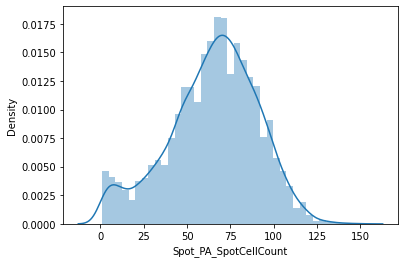

In [129]:
sns.distplot(cell_count)

## Mean of cell count for every combination of ECMP and Ligand for stain set 1

In [131]:
stain1.groupby(['ECMp', 'Ligand1']).mean()["Spot_PA_SpotCellCount"]

ECMp     Ligand1               
ALCAM|1  ANGPT1|1_Q15389|1         60.466667
         ANGPT2|1_O15123|1         47.600000
         AREG_P15514               70.533333
         BMP2_P12643               54.600000
         BMP3_P12645               78.800000
                                     ...    
gelatin  TNF_P01375                13.000000
         VEGFA|VEGF206_P15692|1     4.000000
         WNT10A_Q9GZT5              5.000000
         WNT3A|1_P56704|1          12.000000
         Wnt5a|1_P22725|1           1.000000
Name: Spot_PA_SpotCellCount, Length: 2847, dtype: float64